# Web 1 - How to get data from the Internet

In [1]:
import requests
import json
import pandas as pd
from pandas import Series, DataFrame

###  P10 check-in

In [2]:
# It is very important to check auto-grader test results on p10 in a timely manner.
# Take a few minutes to verify if you hardcoded the slashes in P10 rather than using os.path.join? 
       # Your code won't clear auto-grader if you hardcode either "/" or "\" 
       # for *ANY* relative path in the entire project
# Check your code and check the autograder as soon as possible.

### Warmup 1: Read the data from "IMDB-Movie-Data.csv" into a pandas DataFrame called "movies"

In [3]:
movies = pd.read_csv("IMDB-Movie-Data.csv")
movies

,Index,Title,Genre,Director,Cast,Year,Runtime,Rating,Revenue
0,0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,333.13
1,1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael ...",2012,124,7.0,126.46M
2,2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,138.12M
3,3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,270.32
4,4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,325.02
...,...,...,...,...,...,...,...,...,...
1063,1063,Guardians of the Galaxy Vol. 2,"Action, Adventure, Comedy",James Gunn,"Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",2017,136,7.6,389.81
1064,1064,Baby Driver,"Action, Crime, Drama",Edgar Wright,"Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...",2017,113,7.6,107.83
1065,1065,Only the Brave,"Action, Biography, Drama",Joseph Kosinski,"Josh Brolin, Miles Teller, Jeff Bridges, Jenni...",2017,134,7.6,18.34
1066,1066,Incredibles 2,"Animation, Action, Adventure",Brad Bird,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H...",2018,118,7.6,608.58


### Warmup 2: fixing duplicate index columns

Notice that there are two index columns
- That happened because when you write a csv from pandas to a file, it writes a new index column
- So if the DataFrame already contains an index, you are going to get two index columns
- Let's fix that problem

In [4]:
#use slicing to retain all the rows and columns excepting for column with integer position 0
movies = movies.iloc[:, 1:] 
movies

,Title,Genre,Director,Cast,Year,Runtime,Rating,Revenue
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,333.13
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael ...",2012,124,7.0,126.46M
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,138.12M
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,270.32
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,325.02
...,...,...,...,...,...,...,...,...
1063,Guardians of the Galaxy Vol. 2,"Action, Adventure, Comedy",James Gunn,"Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",2017,136,7.6,389.81
1064,Baby Driver,"Action, Crime, Drama",Edgar Wright,"Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...",2017,113,7.6,107.83
1065,Only the Brave,"Action, Biography, Drama",Joseph Kosinski,"Josh Brolin, Miles Teller, Jeff Bridges, Jenni...",2017,134,7.6,18.34
1066,Incredibles 2,"Animation, Action, Adventure",Brad Bird,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H...",2018,118,7.6,608.58


In [5]:
movies.to_csv("better_movies.csv", index = False)

### Warmup 3: Which movie has highest rating?

In [6]:
max_rating = movies["Rating"].max()
movies[movies["Rating"] == max_rating]

,Title,Genre,Director,Cast,Year,Runtime,Rating,Revenue
54,The Dark Knight,"Action,Crime,Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,533.32


### Warmup 4: Which movies were released in 2020?

In [7]:
movies[movies["Year"] == 2020]

,Title,Genre,Director,Cast,Year,Runtime,Rating,Revenue
998,Hamilton,"Biography, Drama, History",Thomas Kail,"Lin-Manuel Miranda, Phillipa Soo, Leslie Odom ...",2020,160,8.6,612.82
1000,Soorarai Pottru,Drama,Sudha Kongara,"Suriya, Madhavan, Paresh Rawal, Aparna Balamurali",2020,153,8.6,5.93
1022,Soul,"Animation, Adventure, Comedy",Pete Docter,"Kemp Powers, Jamie Foxx, Tina Fey, Graham Norton",2020,100,8.1,121.0
1031,Dil Bechara,"Comedy, Drama, Romance",Mukesh Chhabra,"Sushant Singh Rajput, Sanjana Sanghi, Sahil Va...",2020,101,7.9,263.61
1047,The Trial of the Chicago 7,"Drama, History, Thriller",Aaron Sorkin,"Eddie Redmayne, Alex Sharp, Sacha Baron Cohen,...",2020,129,7.8,0.12
1048,Druk,"Comedy, Drama",Thomas Vinterberg,"Mads Mikkelsen, Thomas Bo Larsen, Magnus Milla...",2020,117,7.8,21.71


### Warmup 5a: What does this function do?

In [8]:
def format_revenue(revenue):
    if type(revenue) == float: # need this in here if we run code multiple times
        return revenue
    elif revenue[-1] == 'M': # some have an "M" at the end
        return float(revenue[:-1]) * 1e6
    else:                    # otherwise, assume millions.
        return float(revenue) * 1e6

### Warmup 5b: Using the above function, create a new column called "Revenue in dollars" by applying appropriate conversion to Revenue column.

In [9]:
movies["Revenue in dollars"] = movies["Revenue"].apply(format_revenue)
movies

,Title,Genre,Director,Cast,Year,Runtime,Rating,Revenue,Revenue in dollars
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,333.13,333130000.0
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael ...",2012,124,7.0,126.46M,126460000.0
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,138.12M,138120000.0
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,270.32,270320000.0
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,325.02,325020000.0
...,...,...,...,...,...,...,...,...,...
1063,Guardians of the Galaxy Vol. 2,"Action, Adventure, Comedy",James Gunn,"Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...",2017,136,7.6,389.81,389810000.0
1064,Baby Driver,"Action, Crime, Drama",Edgar Wright,"Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...",2017,113,7.6,107.83,107830000.0
1065,Only the Brave,"Action, Biography, Drama",Joseph Kosinski,"Josh Brolin, Miles Teller, Jeff Bridges, Jenni...",2017,134,7.6,18.34,18340000.0
1066,Incredibles 2,"Animation, Action, Adventure",Brad Bird,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H...",2018,118,7.6,608.58,608580000.0


### Warmup 6: What are the top 10 highest-revenue movies?

In [10]:
movies.sort_values(by = "Revenue in dollars", ascending = False).head(10)

,Title,Genre,Director,Cast,Year,Runtime,Rating,Revenue,Revenue in dollars
50,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,936.63,936630000.0
1006,Avengers: Endgame,"Action, Adventure, Drama",Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Evans, Mar...",2019,181,8.4,858.37,858370000.0
87,Avatar,"Action,Adventure,Fantasy",James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,760.51,760510000.0
1007,Avengers: Infinity War,"Action, Adventure, Sci-Fi",Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Hemsworth,...",2018,149,8.4,678.82,678820000.0
85,Jurassic World,"Action,Adventure,Sci-Fi",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,652.18,652180000.0
76,The Avengers,"Action,Sci-Fi",Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,623.28,623280000.0
998,Hamilton,"Biography, Drama, History",Thomas Kail,"Lin-Manuel Miranda, Phillipa Soo, Leslie Odom ...",2020,160,8.6,612.82,612820000.0
1066,Incredibles 2,"Animation, Action, Adventure",Brad Bird,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H...",2018,118,7.6,608.58,608580000.0
54,The Dark Knight,"Action,Crime,Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,533.32,533320000.0
12,Rogue One,"Action,Adventure,Sci-Fi",Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,532.17,532170000.0


### Warmup 7: Which shortest movies (below average runtime) have highest rating?

In [11]:
short_movies = movies[movies["Runtime"] < movies["Runtime"].mean()]
short_movies[short_movies["Rating"] == short_movies["Rating"].max()]

,Title,Genre,Director,Cast,Year,Runtime,Rating,Revenue,Revenue in dollars
96,Kimi no na wa,"Animation,Drama,Fantasy",Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,4.68,4680000.0
249,The Intouchables,"Biography,Comedy,Drama",Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,13.18,13180000.0


### Learning Objectives

- Make a request for data using requests.get(URL)
- Check the status of a request/response
- Extract the text of a response
- Create a json file from a response
- State and practice good etiquette when getting data

### Core Ideas:
 - Network structure
     - Client / server
     - Request / response
  
    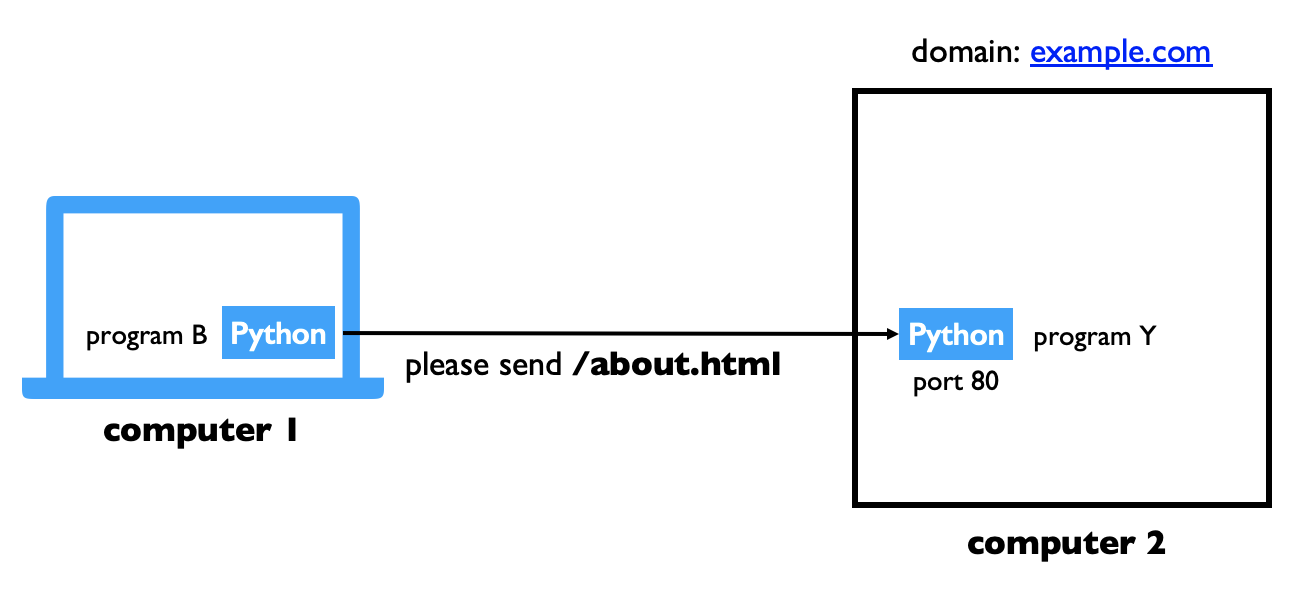
    
 - HTTP protocol
     - URL
     - Headers
     - Status Codes
 - The requests module

## HTTP Status Codes you need to know
- 200: success
- 404: not found

Here is a list of all status codes, you do NOT need to memorize it: https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

## requests.get : Simple string example
- URL: https://www.msyamkumar.com/hello.txt

In [12]:
url = "https://www.msyamkumar.com/hello.txt"
r = requests.get(url) # r is the response
print(r.status_code)
print(r.text)

200
Hello CS220 / CS319 students! Welcome to my website. Hope you are staying safe and healthy!



In [13]:
# Q: What if the web site does not exist?
typo_url = "https://www.msyamkumar.com/hello.txttttt"
r = requests.get(typo_url)
print(r.status_code)
print(r.text)

# A: We get a 404 (client error)

404
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>meena/hello.txttttt</Key><RequestId>9PAFR0FANW1CRPTP</RequestId><HostId>Y+VL63r3qTktX1ZLIpaUvaSXOhstWA4yhSSA6RKCRumeA5+WK+ht7TbROpUZtVjmpGT/QaJcYA0=</HostId></Error>


In [14]:
# We can check for a status_code error by using an assert
typo_url = "https://www.msyamkumar.com/hello.txttttt"
r = requests.get(typo_url)
assert r.status_code == 200
print(r.status_code)
print(r.text)

AssertionError: 

In [15]:
# Instead of using an assert, we often use raise_for_status()
r = requests.get(typo_url)
r.raise_for_status() #similar to asserting r.status_code == 200
r.text

# Note the error you get.... We will use this in the next cell

HTTPError: 404 Client Error: Not Found for url: https://www.msyamkumar.com/hello.txttttt

In [16]:
# Let's try to catch that error

try:
    r = requests.get(typo_url)
    r.raise_for_status() #similar to asserting r.status_code == 200
    r.text
except HTTPError as e: # What's still wrong here?
    print("oops!!", e)

NameError: name 'HTTPError' is not defined

In [ ]:
# we often need to prepend the names of exceptions with the name of the module
# fix the error from above

try:
    r = requests.get(typo_url)
    r.raise_for_status() #similar to asserting r.status_code == 200
    r.text
except requests.HTTPError as e: #correct way to catch the error.
    print("oops!!", e)
    


## requests.get : JSON file example
- URL: https://www.msyamkumar.com/scores.json
- `json.load` (FILE_OBJECT)
- `json.loads` (STRING)

In [17]:
# GETting a JSON file, the long way
url = "https://www.msyamkumar.com/scores.json"
r = requests.get(url)
r.raise_for_status()
urltext = r.text
print(urltext)
d = json.loads(urltext)
print(type(d), d)

{
  "alice": 100,
  "bob": 200,
  "cindy": 300
}

<class 'dict'> {'alice': 100, 'bob': 200, 'cindy': 300}


In [18]:
# GETting a JSON file, the shortcut way
url = "https://www.msyamkumar.com/scores.json"
#Shortcut to bypass using json.loads()
r = requests.get(url)
r.raise_for_status()
d2 = r.json()
print(type(d2), d2)

<class 'dict'> {'alice': 100, 'bob': 200, 'cindy': 300}


## Good GET Etiquette

Don't make a lot of requests to the same server all at once.
 - Requests use up the server's time
 - Major websites will often ban users who make too many requests
 - You can break a server....similar to DDoS attacks (DON'T DO THIS)
 
In CS220 we will usually give you a link to a copied file to avoid overloading the site.


## DEMO: Course Enrollment

Explore the API!

https://coletnelson.us/cs220-api/classes

https://coletnelson.us/cs220-api/classes_as_txt

https://coletnelson.us/cs220-api/classes/MATH_221

https://coletnelson.us/cs220-api/classes/COMPSCI_200

... etc

https://coletnelson.us/cs220-api/all_data

### Get the list of classes.

#### When the data is `json`

In [19]:
url = "https://coletnelson.us/cs220-api/classes"
r = requests.get(url)
r.raise_for_status()
classes_list = r.json()
print(type(classes_list))
print(classes_list)

<class 'list'>
['PSYCH_202', 'COMPSCI_537', 'COMPSCI_300', 'CHEM_104', 'COMPSCI_200', 'MATH_114', 'PSYCH_456', 'COMPSCI_252', 'COMPSCI_400', 'MATH_221', 'BIOLOGY_101', 'COMPSCI_354', 'CHEM_103', 'COMPSCI_639', 'PSYCH_401', 'COMPSCI_240', 'STATS_302']


#### When the data is `text`

In [20]:
url = "https://coletnelson.us/cs220-api/classes_as_txt"
r = requests.get(url)
r.raise_for_status()
classes_txt = r.text
print(type(classes_txt))
print(classes_txt)

<class 'str'>
PSYCH_202
COMPSCI_537
COMPSCI_300
CHEM_104
COMPSCI_200
MATH_114
PSYCH_456
COMPSCI_252
COMPSCI_400
MATH_221
BIOLOGY_101
COMPSCI_354
CHEM_103
COMPSCI_639
PSYCH_401
COMPSCI_240
STATS_302


In [21]:
classes_txt_as_list = classes_txt.split('\n')
classes_txt_as_list

['PSYCH_202',
 'COMPSCI_537',
 'COMPSCI_300',
 'CHEM_104',
 'COMPSCI_200',
 'MATH_114',
 'PSYCH_456',
 'COMPSCI_252',
 'COMPSCI_400',
 'MATH_221',
 'BIOLOGY_101',
 'COMPSCI_354',
 'CHEM_103',
 'COMPSCI_639',
 'PSYCH_401',
 'COMPSCI_240',
 'STATS_302']

### Get data for a specific class

In [22]:
url = "https://coletnelson.us/cs220-api/classes/COMPSCI_200"
r = requests.get(url)
r.raise_for_status()
cs200_data = r.json()
print(type(cs200_data))
print(cs200_data) # Too much data? Try print(cs220_data.keys())

<class 'dict'>
{'credits': 3, 'description': 'Learn the process of incrementally developing small (200-500 lines) programs along with the fundamental Computer Science topics. These topics include: problem abstraction and decomposition, the edit-compile-run cycle, using variables of primitive and more complex data types, conditional and loop-based flow control, basic testing and debugging techniques, how to define and call functions (methods), and IO processing techniques. Also teaches and reinforces good programming practices including the use of a consistent style, and meaningful documentation. Intended for students who have no prior programming experience.', 'keywords': ['computer', 'science', 'programming', 'java'], 'name': 'Programming 1', 'number': 'COMPSCI_200', 'requisites': [], 'sections': [{'instructor': 'Jim Williams', 'location': '132 Noland Hall', 'subsections': [{'location': '1350 Computer Sciences and Statistics', 'time': {'wednesday': '9:30am - 10:45am'}, 'number': 'LAB_

In [23]:
cs200_data.keys()

dict_keys(['credits', 'description', 'keywords', 'name', 'number', 'requisites', 'sections', 'subject'])

In [24]:
# Get the number of credits the course is worth
cs200_data['credits']

3

In [25]:
# Get the list of keywords for the course
cs200_data['keywords']

['computer', 'science', 'programming', 'java']

In [26]:
# Get the official course name
cs200_data['name']

'Programming 1'

In [27]:
# Get the number of sections offered.
len(cs200_data['sections'])

4

In [28]:
# Collect all the class data in a list called 'all_class_data'
all_class_data = []
for class_num in classes_list:
    url = "https://coletnelson.us/cs220-api/classes/" + class_num
    r = requests.get(url)
    r.raise_for_status()
    class_data = r.json()
    all_class_data.append(class_data)

print(all_class_data) # Too much data? Try print(len(all_class_data))

[{'credits': 3, 'description': 'Behavior, including its development, motivation, frustrations, emotion, intelligence, learning, forgetting, personality, language, thinking, and social behavior.', 'keywords': ['psychology', 'behavior', 'emotion', 'intelligence', 'brain'], 'name': 'Introduction to Psychology', 'number': 'PSYCH_202', 'requisites': [], 'sections': [{'instructor': 'Jeff Henriques', 'location': '105 Brogden Psychology Building', 'subsections': [], 'time': {'thursday': '9:30am - 10:45am', 'tuesday': '9:30am - 10:45am'}, 'number': 'LEC_001'}, {'instructor': 'Jeff Henriques', 'location': '105 Brogden Psychology Building', 'subsections': [], 'time': {'thursday': '11:00am - 12:15pm', 'tuesday': '11:00am - 12:15pm'}, 'number': 'LEC_002'}, {'instructor': 'C. Shawn Green', 'location': '105 Brogden Psychology Building', 'subsections': [], 'time': {'monday': '8:00am - 9:15am', 'wednesday': '8:00am - 9:15am'}, 'number': 'LEC_003'}, {'instructor': 'Patti Coffey', 'location': '105 Brogde

In [29]:
print(len(all_class_data))

17


In [30]:
# Print the number of credits, course number, and name for each class.
for spec_class in all_class_data:
    print(spec_class['credits'], spec_class['number'], spec_class['name'])

3 PSYCH_202 Introduction to Psychology
4 COMPSCI_537 Introduction to Operating Systems
3 COMPSCI_300 Programming 2
5 CHEM_104 General Chemistry II
3 COMPSCI_200 Programming 1
5 MATH_114 Algebra and Trigonometry
4 PSYCH_456 Introductory Social Psychology
2 COMPSCI_252 Introduction to Computer Engineering
3 COMPSCI_400 Programming 3
5 MATH_221 Calculus and Analytical Geometry 1
3 BIOLOGY_101 Animal Biology
3 COMPSCI_354 Machine Organization and Programming
4 CHEM_103 General Chemistry I
3 COMPSCI_639 Building User Interfaces
3 PSYCH_401 Psychology, Law, and Social Policy
3 COMPSCI_240 Introduction To Discrete Mathematics
3 STATS_302 Accelerated Introduction to Statistical Methods


In [31]:
# What is the average number of credits per course?
num_credits = 0 
for spec_class in all_class_data:
    num_credits += spec_class['credits']
num_credits / len(all_class_data)

3.4705882352941178

In [32]:
# What are the unique subjects?
subjects = []
for spec_class in all_class_data:
    subjects.append(spec_class['subject'])
list(set(subjects))

['Biology',
 'Chemistry',
 'Computer Science',
 'Mathematics',
 'Psychology',
 'Statistics']

In [33]:
# Besides PYSCH 202, what are the course numbers of the courses
# with the most sections offered (not including subsections)?
high_courses = []
high_sections = 0
for spec_class in all_class_data:
    current_course_num = spec_class['number']
    current_num_sects = len(spec_class['sections'])
    
    if current_course_num == 'PSYCH_202':
        continue
    
    if current_num_sects == high_sections:
        high_courses.append(current_course_num)
    elif current_num_sects > high_sections:
        high_courses = []
        high_courses.append(current_course_num)
        high_sections = current_num_sects
high_courses

['COMPSCI_300', 'COMPSCI_200', 'COMPSCI_400']

### Can we make a Pandas dataframe? Yes!

In [34]:
all_course_frame = DataFrame(all_class_data)
all_course_frame

,credits,description,keywords,name,number,requisites,sections,subject
0,3,"Behavior, including its development, motivatio...","[psychology, behavior, emotion, intelligence, ...",Introduction to Psychology,PSYCH_202,[],"[{'instructor': 'Jeff Henriques', 'location': ...",Psychology
1,4,"Input-output hardware, interrupt handling, pro...","[computer, science, operating, system, systems]",Introduction to Operating Systems,COMPSCI_537,"[[COMPSCI_354, COMPSCI_400]]","[{'instructor': 'Andrea Arpaci-Dusseau', 'loca...",Computer Science
2,3,Introduces students to Object-Oriented Program...,"[computer, science, programming, java]",Programming 2,COMPSCI_300,[[COMPSCI_200]],"[{'instructor': 'Gary Dahl', 'location': 'AB20...",Computer Science
3,5,Principles and application of chemical equilib...,[chemistry],General Chemistry II,CHEM_104,"[[MATH_114], [CHEM_103]]","[{'instructor': 'Linda Zelewski', 'location': ...",Chemistry
4,3,Learn the process of incrementally developing ...,"[computer, science, programming, java]",Programming 1,COMPSCI_200,[],"[{'instructor': 'Jim Williams', 'location': '1...",Computer Science
5,5,The two semester sequence MATH_112-MATH_113 co...,"[math, mathematics, algebra, trigonometry]",Algebra and Trigonometry,MATH_114,[],"[{'instructor': 'Sharad Chandarana', 'location...",Mathematics
6,4,The systematic study of the individual in a so...,"[psychology, science, social, interaction, beh...",Introductory Social Psychology,PSYCH_456,[[PSYCH_202]],"[{'instructor': 'Abigail Letak', 'location': '...",Psychology
7,2,"Logic components built with transistors, rudim...","[computer, science, engineering, programming]",Introduction to Computer Engineering,COMPSCI_252,[],"[{'instructor': 'Joseph Krachey', 'location': ...",Computer Science
8,3,The third course in our programming fundamenta...,"[computer, science, programming, java]",Programming 3,COMPSCI_400,[[COMPSCI_300]],"[{'instructor': 'Gary Dahl', 'location': 'AB20...",Computer Science
9,5,Introduction to differential and integral calc...,"[math, mathematics, calculus, analytical, geom...",Calculus and Analytical Geometry 1,MATH_221,[[MATH_114]],"[{'instructor': 'Laurentiu Maxim', 'location':...",Mathematics


### We may want to do some "plumbing" with our data.

In [35]:
# Remove the 'sections' and 'requisites' column.
new_course_frame = all_course_frame.loc[:, "credits":"number"]
new_course_frame["subject"] = all_course_frame.loc[:, "subject"]
new_course_frame

,credits,description,keywords,name,number,subject
0,3,"Behavior, including its development, motivatio...","[psychology, behavior, emotion, intelligence, ...",Introduction to Psychology,PSYCH_202,Psychology
1,4,"Input-output hardware, interrupt handling, pro...","[computer, science, operating, system, systems]",Introduction to Operating Systems,COMPSCI_537,Computer Science
2,3,Introduces students to Object-Oriented Program...,"[computer, science, programming, java]",Programming 2,COMPSCI_300,Computer Science
3,5,Principles and application of chemical equilib...,[chemistry],General Chemistry II,CHEM_104,Chemistry
4,3,Learn the process of incrementally developing ...,"[computer, science, programming, java]",Programming 1,COMPSCI_200,Computer Science
5,5,The two semester sequence MATH_112-MATH_113 co...,"[math, mathematics, algebra, trigonometry]",Algebra and Trigonometry,MATH_114,Mathematics
6,4,The systematic study of the individual in a so...,"[psychology, science, social, interaction, beh...",Introductory Social Psychology,PSYCH_456,Psychology
7,2,"Logic components built with transistors, rudim...","[computer, science, engineering, programming]",Introduction to Computer Engineering,COMPSCI_252,Computer Science
8,3,The third course in our programming fundamenta...,"[computer, science, programming, java]",Programming 3,COMPSCI_400,Computer Science
9,5,Introduction to differential and integral calc...,"[math, mathematics, calculus, analytical, geom...",Calculus and Analytical Geometry 1,MATH_221,Mathematics


In [36]:
# Turn 'keywords' into a series of Strings and remove the '[', ']', '''
new_course_frame["keywords"] = new_course_frame["keywords"].astype('string')
new_course_frame["keywords"] = new_course_frame["keywords"].str.replace("[", "", regex=False)
new_course_frame["keywords"] = new_course_frame["keywords"].str.replace("]", "", regex=False)
new_course_frame["keywords"] = new_course_frame["keywords"].str.replace("'", "", regex=False)
new_course_frame

,credits,description,keywords,name,number,subject
0,3,"Behavior, including its development, motivatio...","psychology, behavior, emotion, intelligence, b...",Introduction to Psychology,PSYCH_202,Psychology
1,4,"Input-output hardware, interrupt handling, pro...","computer, science, operating, system, systems",Introduction to Operating Systems,COMPSCI_537,Computer Science
2,3,Introduces students to Object-Oriented Program...,"computer, science, programming, java",Programming 2,COMPSCI_300,Computer Science
3,5,Principles and application of chemical equilib...,chemistry,General Chemistry II,CHEM_104,Chemistry
4,3,Learn the process of incrementally developing ...,"computer, science, programming, java",Programming 1,COMPSCI_200,Computer Science
5,5,The two semester sequence MATH_112-MATH_113 co...,"math, mathematics, algebra, trigonometry",Algebra and Trigonometry,MATH_114,Mathematics
6,4,The systematic study of the individual in a so...,"psychology, science, social, interaction, beha...",Introductory Social Psychology,PSYCH_456,Psychology
7,2,"Logic components built with transistors, rudim...","computer, science, engineering, programming",Introduction to Computer Engineering,COMPSCI_252,Computer Science
8,3,The third course in our programming fundamenta...,"computer, science, programming, java",Programming 3,COMPSCI_400,Computer Science
9,5,Introduction to differential and integral calc...,"math, mathematics, calculus, analytical, geome...",Calculus and Analytical Geometry 1,MATH_221,Mathematics


### Pandas Operations

In [37]:
# What is the most number of credits a course offers?
new_course_frame["credits"].max()

5

In [38]:
# What is the least number of credits a course offers?
new_course_frame["credits"].min()

2

In [39]:
# What is the info for that course?
new_course_frame.iloc[new_course_frame["credits"].idxmin()]

credits                                                        2
description    Logic components built with transistors, rudim...
keywords             computer, science, engineering, programming
name                        Introduction to Computer Engineering
number                                               COMPSCI_252
subject                                         Computer Science
Name: 7, dtype: object

In [40]:
# What courses contain the keyword "programming"?
mask = new_course_frame["keywords"].str.contains("programming")
new_course_frame[mask]

,credits,description,keywords,name,number,subject
2,3,Introduces students to Object-Oriented Program...,"computer, science, programming, java",Programming 2,COMPSCI_300,Computer Science
4,3,Learn the process of incrementally developing ...,"computer, science, programming, java",Programming 1,COMPSCI_200,Computer Science
7,2,"Logic components built with transistors, rudim...","computer, science, engineering, programming",Introduction to Computer Engineering,COMPSCI_252,Computer Science
8,3,The third course in our programming fundamenta...,"computer, science, programming, java",Programming 3,COMPSCI_400,Computer Science
11,3,An introduction to fundamental structures of c...,"computer, science, engineering, electrical, ma...",Machine Organization and Programming,COMPSCI_354,Computer Science


In [41]:
# What course has the most lengthy description?
idx_max_desc = new_course_frame["description"].str.len().idxmax()
new_course_frame.iloc[idx_max_desc]['name']

'Psychology, Law, and Social Policy'

### Write it out to a CSV file on your drive
You now have your own copy!

In [42]:
# Write it all out to a single CSV file
new_course_frame.to_csv("my_course_data.csv", index=False)

### Other Cool APIs

- City of Madison Transit: http://transitdata.cityofmadison.com/
- Reddit: https://reddit.com/r/UWMadison.json
- Lord of the Rings: https://the-one-api.dev/
- Pokemon: https://pokeapi.co/

Remember: Be judicious when making requests; don't overwhelm the server! :)

## Next Time
What other documents can we get via the Web? HTML is very popular! We'll explore this.